## Simulator of distance-based Classifier

In [1]:
import getpass, time
from qiskit import ClassicalRegister, QuantumRegister, QuantumProgram, QuantumCircuit
from qiskit import available_backends, execute, register, least_busy, register
from qiskit.tools.visualization import plot_histogram, matplotlib_circuit_drawer 

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from math import pi
import math

In [3]:
APItoken = getpass.getpass('Please input your token and hit enter: ')
qx_config = {
    "APItoken": APItoken,
    "url":"https://quantumexperience.ng.bluemix.net/api"}
print('Qconfig.py not found in qiskit-tutorial directory; Qconfig loaded using user input.')

Please input your token and hit enter: ········
Qconfig.py not found in qiskit-tutorial directory; Qconfig loaded using user input.


#### Classifier

$\tilde{y} = sgn(\sum_{m=1}^{M} y^{m} \big[1 - \frac{1}{4M} {\vert \tilde{x} - x^{m} \vert}^{2} \big])$

#### Our training data are:

$|\psi_{x^0}\rangle = |1\rangle \quad y^0 = -1$

$|\psi_{x^1}\rangle = 0.789|0\rangle + 0.615|1\rangle \quad y^1 = 1$

#### Our test examples are

$|\psi_{\tilde{x'}}\rangle = - 0.549|0\rangle + 0.836|1\rangle \quad \tilde{y'} = -1$

$|\psi_{\tilde{x''}}\rangle = 0.053|0\rangle + 0.999|1\rangle \quad \tilde{y''} = -1$

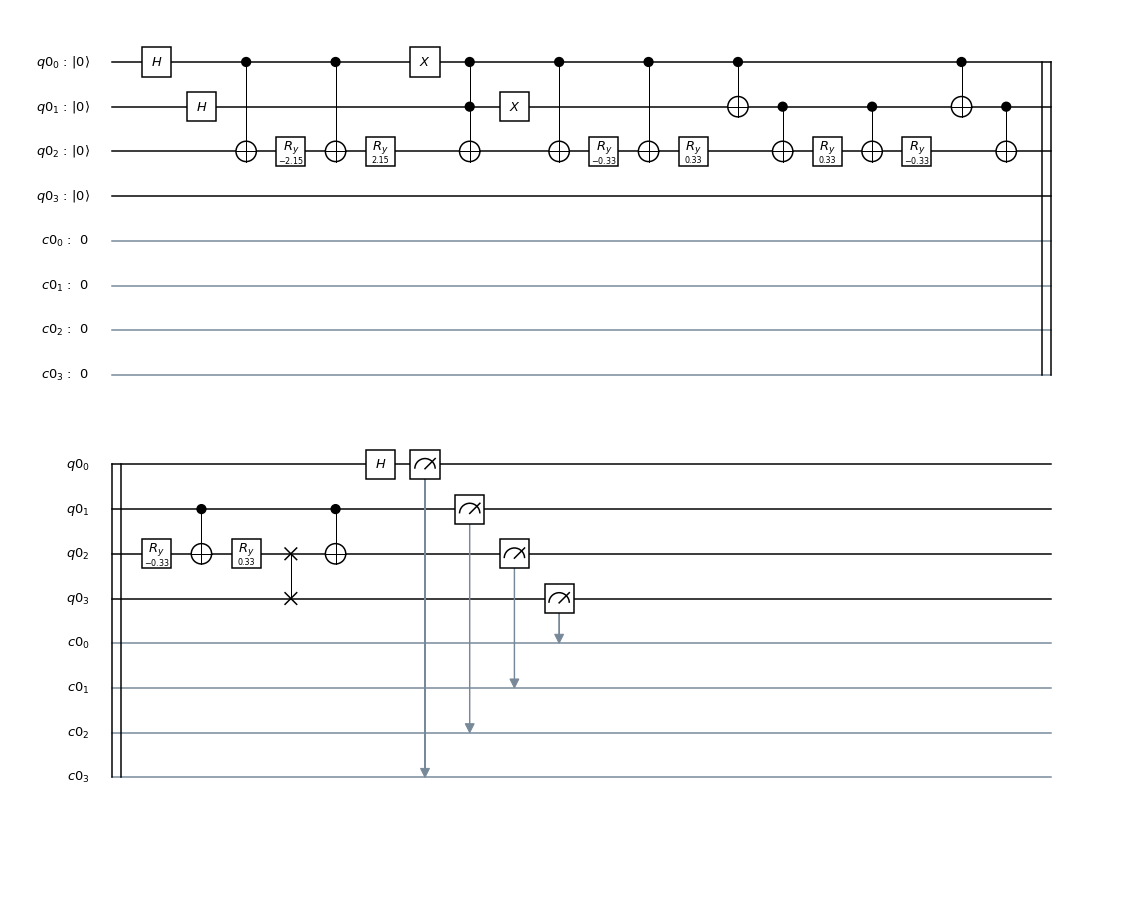

In [4]:
# Circuit to classify the first test examples

q = QuantumRegister(4)
c = ClassicalRegister(4)
qc = QuantumCircuit(q, c)

# Step A: prepare the index qubit and ancilla qubit in superposition
qc.h(q[0])
qc.h(q[1])

# Step B: entangle the test data (-0.549, 0.836) with the ground state of the ancilla
qc.cry(2 * math.acos(-0.549), q[0], q[2])
qc.x(q[0])

# Step C: entangle the training data (0, 1) with the excited state of the ancilla and the ground state of the index qubit
qc.ccx(q[0], q[1], q[2])
qc.x(q[1])

# Step D: entangle the training data (0.789, 0.615) with the excited state of the ancilla and of the index qubit
qc.ccry(2 * math.asin(0.615), q[0], q[1], q[2])

# Step E: Swap the data and the class qubits (due to the topology of IBM 5 QX) 
# and the class qubit is flipped given the index qubit is 1
qc.swap(q[2], q[3])
qc.cx(q[1], q[2])

# Step F: Hadamard gate on the ancilla qubit and measurement
qc.h(q[0])
qc.measure(q[0], c[3])
qc.measure(q[1], c[2])
qc.measure(q[2], c[1])
qc.measure(q[3], c[0])

matplotlib_circuit_drawer(qc)

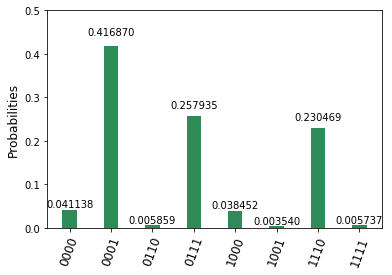

In [5]:
job = execute(qc, backend='local_qasm_simulator', shots=8192)
plot_histogram(job.result().get_counts(qc))

Theoretical prediction: 

$ Pacc = 0.729 \quad 
P(|c\rangle = |0\rangle) = 0.629$

Simulation result:

$ Pacc = 0.730 \quad P(|c\rangle = |0\rangle) = 0.632 $ (use the Bayes's rule to obtain this)

In [6]:
# Circuit to classify the second test example

q = QuantumRegister(4)
c = ClassicalRegister(4)
qc = QuantumCircuit(q, c)

# Step A: prepare the index qubit and ancilla qubit in superposition
qc.h(q[0])
qc.h(q[1])

# Step B: entangle the test data (0.053, 0.999) with the ground state of the ancilla
qc.cry(2 * math.acos(0.053), q[0], q[2])
qc.x(q[0])

# Step C: entangle the training data (0, 1) with the excited state of the ancilla and the ground state of the index qubit
qc.ccx(q[0], q[1], q[2])
qc.x(q[1])

# Step D: entangle the training data (0.789, 0.615) with the excited state of the ancilla and of the index qubit
qc.ccry(2 * math.asin(0.615), q[0], q[1], q[2])

# Step E: Swap the data and the class qubits (due to the topology of IBM 5 QX) 
# and the class qubit is flipped given the index qubit is 1
qc.swap(q[2], q[3])
qc.cx(q[1], q[2])

# Step F: Hadamard gate on the ancilla qubit and measurement
qc.h(q[0])
qc.measure(q[0], c[3])
qc.measure(q[1], c[2])
qc.measure(q[2], c[1])
qc.measure(q[3], c[0])

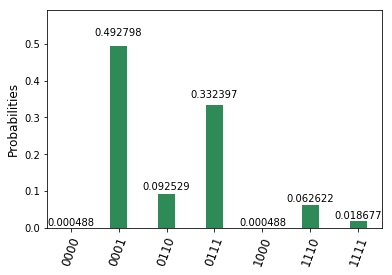

In [7]:
job = execute(qc, backend='local_qasm_simulator', shots=8192)
plot_histogram(job.result().get_counts(qc))

Theoretical prediction: 

$ Pacc = 0.913 \quad 
P(|c\rangle = |0\rangle) = 0.547$

Simulation result:

$ Pacc = 0.915 \quad P(|c\rangle = |0\rangle) = 0.547$

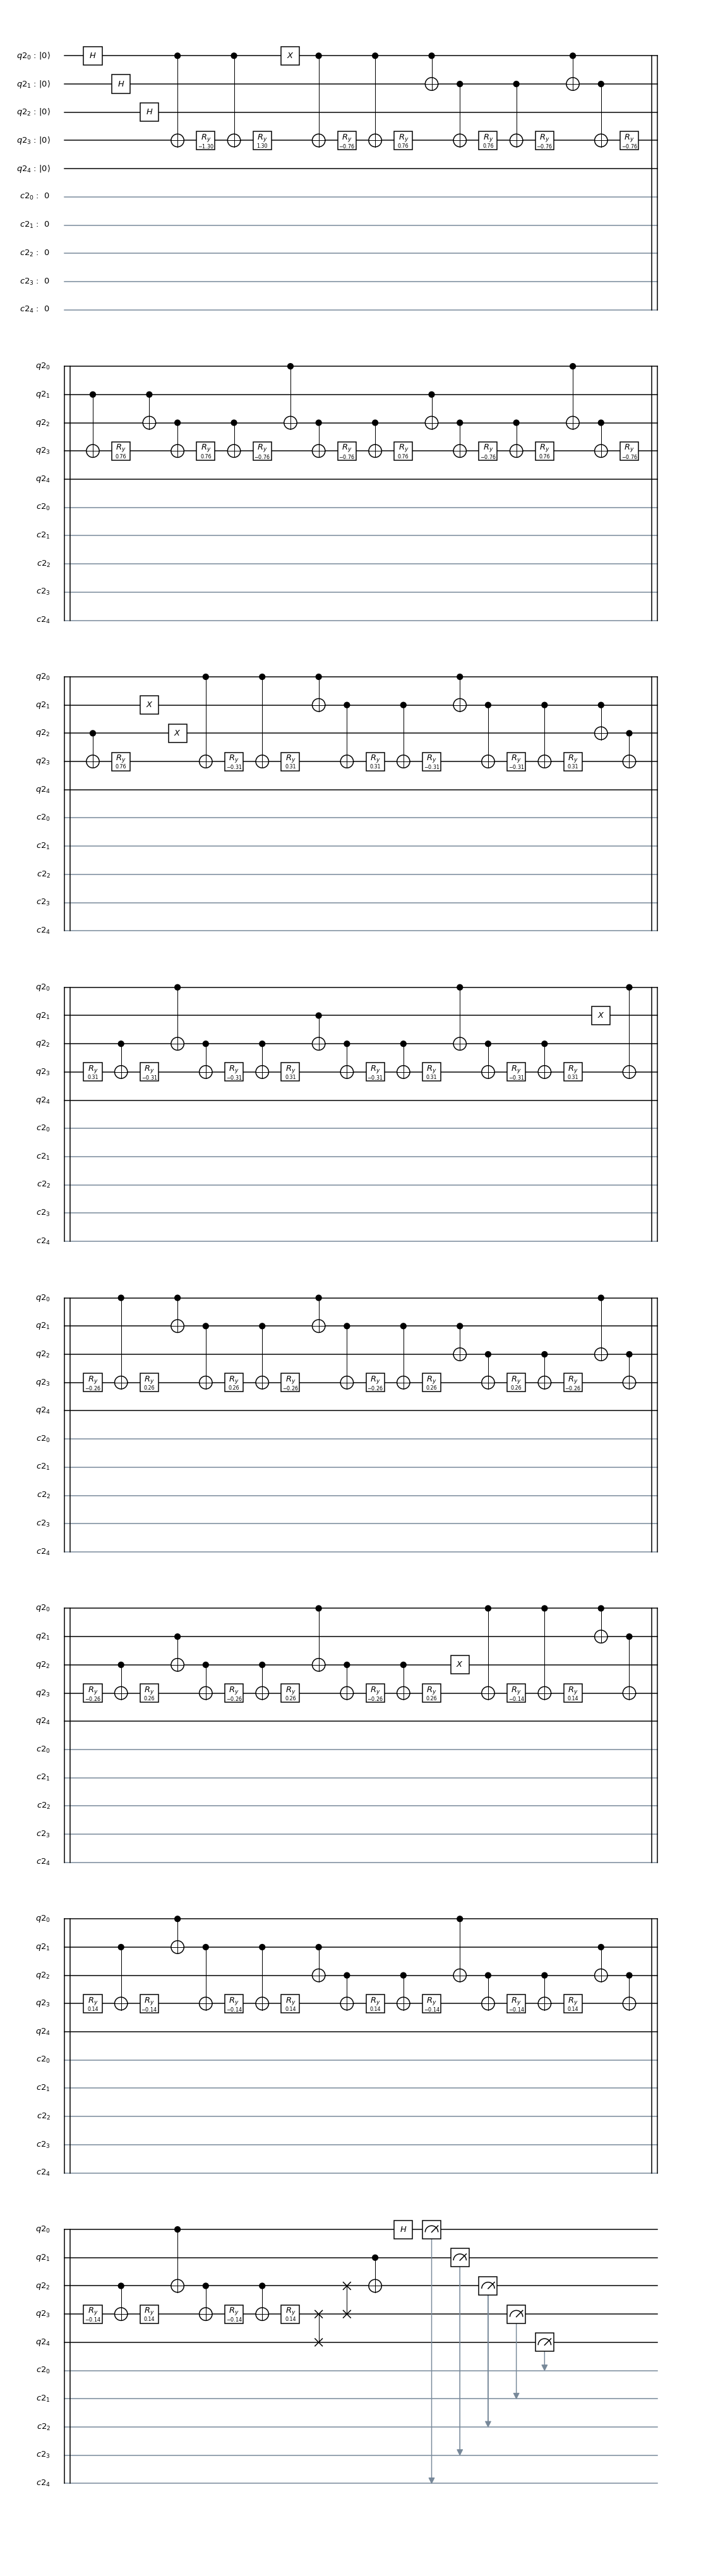

In [8]:
q = QuantumRegister(5)
c = ClassicalRegister(5)

qc = QuantumCircuit(q, c)
# Step A: prepare the index and ancilla qubits in superposition
qc.h(q[0])
qc.h(q[1])
qc.h(q[2])

# Step B: entangle the test example with the ground state of the ancilla
qc.cry(2 * math.acos(0.26874561), q[0], q[3])
qc.x(q[0])

# Step C: entangle the first trainning example with the excited state of the ancilla and the ground states of the two index qubits
qc.cccry(2 * math.acos(-0.99400181), q[0], q[1], q[2], q[3])
qc.x(q[1])
qc.x(q[2])

# Step D: entangle the second test example with the excited state of the ancilla and the LSB and the ground state of the MSB of the index qubits
qc.cccry(2 * math.acos(0.31504145), q[0], q[1], q[2], q[3])
qc.x(q[1])

# Step E: entangle the third test example with the excited state of the ancilla and the MSB and the ground state of the LSB of the index qubits
qc.cccry(2 * math.acos(0.49605891), q[0], q[1], q[2], q[3])
qc.x(q[2])

# Step F: entangle the third test example with the excited state of the ancilla and the index qubits
qc.cccry(2 * math.acos(0.83656481), q[0], q[1], q[2], q[3])

# Step G: Swap the data and the register for the LSB of the index qubit for the class qubit
qc.swap(q[3], q[4])
qc.swap(q[2], q[3])
qc.cx(q[1], q[2])

qc.h(q[0])

qc.barrier(q)
qc.measure(q[0], c[4])
qc.measure(q[1], c[3])
qc.measure(q[2], c[2])
qc.measure(q[3], c[1])
qc.measure(q[4], c[0])

matplotlib_circuit_drawer(qc)

{'00000': 1635, '00001': 270, '00010': 192, '00011': 461, '01100': 1573, '01101': 445, '01110': 462, '01111': 440, '10000': 20, '10001': 165, '10010': 977, '10011': 391, '11100': 18, '11101': 80, '11110': 525, '11111': 538}


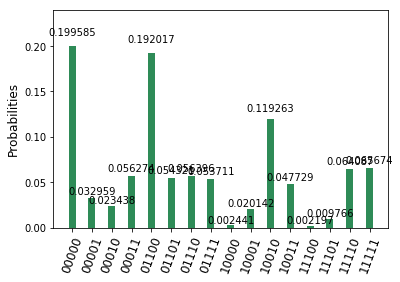

In [9]:
job = execute(qc, backend='local_qasm_simulator', shots=8192)
print(job.result().get_counts(qc))
plot_histogram(job.result().get_counts(qc))

In [10]:
from sklearn import datasets
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize

In [11]:
data, target = datasets.load_iris(True)

In [12]:
data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [13]:
std_scale = StandardScaler().fit(data)
data = std_scale.transform(data)
data = normalize(data)
data

array([[-0.38761701,  0.44415599, -0.57722979, -0.56505246],
       [-0.51928383, -0.05676947, -0.60935325, -0.59649824],
       [-0.57964843,  0.14135986, -0.58499802, -0.54936546],
       [-0.63354328,  0.04476391, -0.54013684, -0.55215151],
       [-0.41160025,  0.50892109, -0.54026381, -0.52886632],
       [-0.20919003,  0.76236403, -0.45588948, -0.40890757],
       [-0.60969183,  0.32402636, -0.54281559, -0.4781569 ],
       [-0.45431978,  0.35597535, -0.57105438, -0.58375678],
       [-0.67521844, -0.13758777, -0.5178538 , -0.50692908],
       [-0.50843685,  0.04734903, -0.57132987, -0.64252021],
       [-0.2212128 ,  0.61559322, -0.52892604, -0.54069134],
       [-0.54052761,  0.34233582, -0.52485982, -0.56138958],
       [-0.53908823, -0.05328586, -0.57196082, -0.61595887],
       [-0.66596618, -0.04450078, -0.53841763, -0.51440761],
       [-0.01786734,  0.74492122, -0.4951245 , -0.44679398],
       [-0.0491545 ,  0.88154117, -0.36352241, -0.29718758],
       [-0.20049547,  0.

In [14]:
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [15]:
data[52,:]

array([0.85761194, 0.07130042, 0.43473865, 0.26536826])

In [16]:
target[52]

1

train data:

class 0:

[-0.38761701,  0.44415599], [-0.51928383, -0.05676947]

class 1:

[0.89814923, 0.21650832], [0.70950531, 0.35538143]

test data:

[-0.57964843,  0.14135986], [0.85761194, 0.07130042]

class 0 and class 1 respectively

{'00000': 1818, '00001': 208, '00010': 204, '00011': 166, '01100': 758, '01101': 219, '01110': 1224, '01111': 719, '10010': 735, '10011': 912, '11100': 247, '11101': 873, '11110': 39, '11111': 70}


<Figure size 720x504 with 0 Axes>

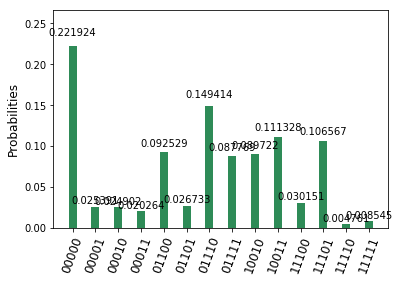

In [17]:
q = QuantumRegister(5)
c = ClassicalRegister(5)

qc = QuantumCircuit(q, c)
# Step A: prepare the index and ancilla qubits in superposition
qc.h(q[0])
qc.h(q[1])
qc.h(q[2])

# Step B: entangle the test example with the ground state of the ancilla
qc.cry(2 * math.acos(-0.57964843), q[0], q[3])
qc.x(q[0])

# Step C: entangle the first trainning example with the excited state of the ancilla and the ground states of the two index qubits
qc.cccry(2 * math.acos(-0.38761701), q[0], q[1], q[2], q[3])
qc.x(q[1])
qc.x(q[2])

# Step D: entangle the second test example with the excited state of the ancilla and the LSB and the ground state of the MSB of the index qubits
qc.cccry(2 * math.acos(-0.51928383), q[0], q[1], q[2], q[3])
qc.x(q[1])

# Step E: entangle the third test example with the excited state of the ancilla and the MSB and the ground state of the LSB of the index qubits
qc.cccry(2 * math.acos(0.89814923), q[0], q[1], q[2], q[3])
qc.x(q[2])

# Step F: entangle the third test example with the excited state of the ancilla and the index qubits
qc.cccry(2 * math.acos(0.70950531), q[0], q[1], q[2], q[3])

# Step G: Swap the data and the register for the LSB of the index qubit for the class qubit
qc.swap(q[3], q[4])
qc.swap(q[2], q[3])
qc.cx(q[1], q[2])

qc.h(q[0])

qc.barrier(q)
qc.measure(q[0], c[4])
qc.measure(q[1], c[3])
qc.measure(q[2], c[2])
qc.measure(q[3], c[1])
qc.measure(q[4], c[0])


job = execute(qc, backend='local_qasm_simulator', shots=8192)
print(job.result().get_counts(qc))
plt.figure(figsize = (10,7))
plot_histogram(job.result().get_counts(qc))

{'0000': 2026, '0100': 2081, '1000': 1746, '1001': 299, '1100': 1740, '1101': 300}


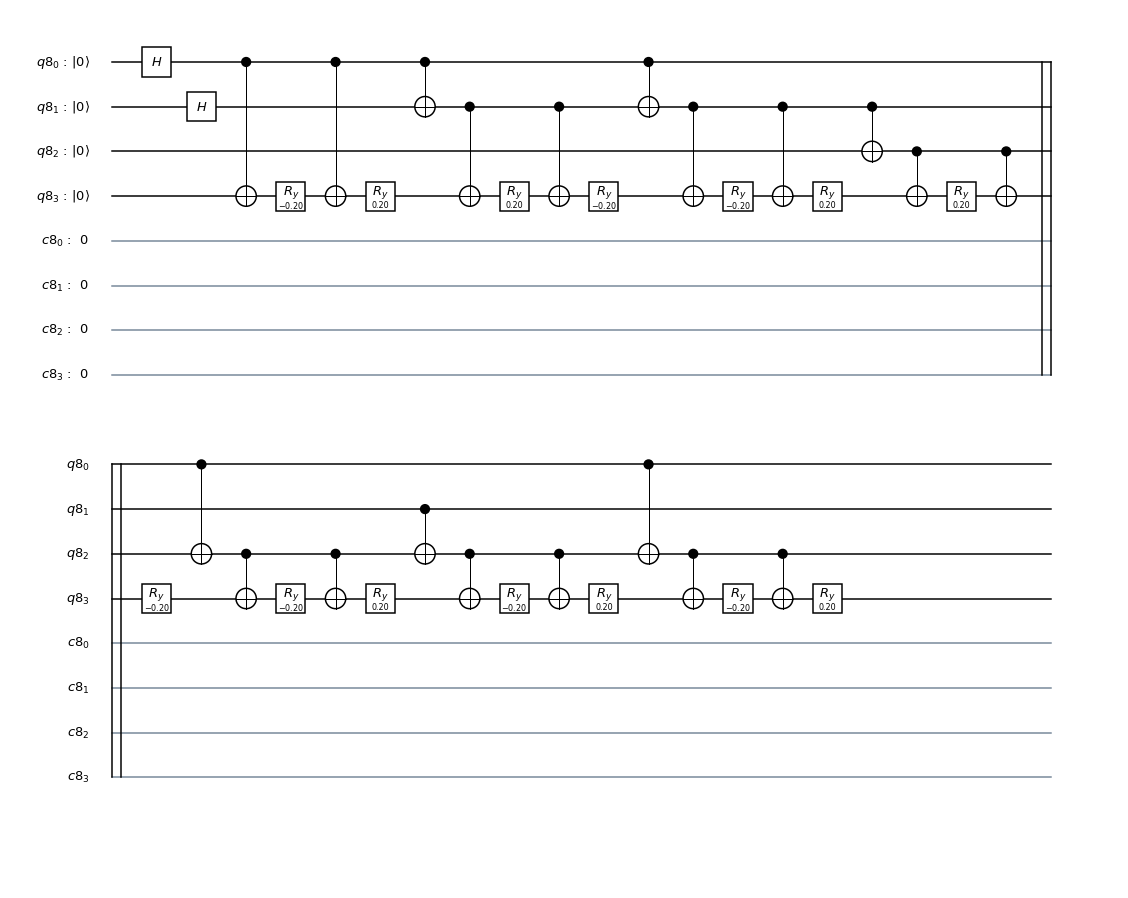

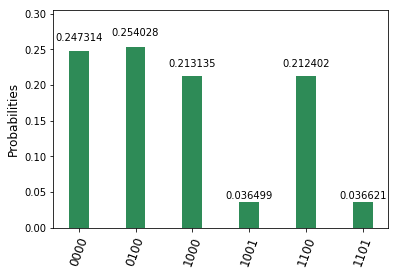

In [21]:
q = QuantumRegister(4)
c = ClassicalRegister(4)
qc = QuantumCircuit(q, c)

qc.h(q[0])
qc.h(q[1])

qc.cccry(math.pi/2, q[0], q[1], q[2], q[3])

matplotlib_circuit_drawer(qc)

qc.measure(q[0], c[3])
qc.measure(q[1], c[2])
qc.measure(q[2], c[1])
qc.measure(q[3], c[0])

job = execute(qc, backend='local_qasm_simulator', shots=8192)
print(job.result().get_counts(qc))
plot_histogram(job.result().get_counts(qc))[]